<!DOCTYPE html>
<html>
<head>
<style>
    .header-banner {
        background-color: white;
        color: black; 
        padding: 1rem; 
        font-family: 'Nunito', sans-serif;
    }
    .header-content {
        max-width: 2000px;
        margin: 0 auto;
        display: flex;
        align-items: center;
        gap: 2rem;
    }
    .logo {
        max-width: 160px;
    }
    .text-content {
        flex: 1;
    }
    .text-content h1 {
        font-size: 34px;
        margin: 0 0 10px;
        font-weight: 700;
        color: #7e4d02ff;
        border-bottom: 2px solid #e5c120ff;
        padding-bottom: 10px;
    }
    .text-content h2 {
        font-size: 21px;
        margin: 0 0 5px;
        font-weight: 600;
        color: #222;
    }
    .member-list {
        display: grid;
        grid-template-columns: repeat(2, auto);
        gap: 6px 40px;
        font-size: 17px;
        color: #444;
    }
    .member {
        position: relative;
        padding-left: 20px;
    }
</style>
<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Nunito:wght@400;700&display=swap" rel="stylesheet">
</head>
<body>

<header class="header-banner">
    <div class="header-content">
        <img src="https://i.ibb.co/JBPWVYR/Logo-Nova-IMS-Black.png" alt="NOVA IMS Logo" class="logo">
        <div class="text-content">
            <h1>Cars 4 You: Expediting Car Evaluations with ML</h1>
            <h2>Group 37</h2>
            <div class="member-list">
                <div class="member">Filipa Pereira, 20240509</div>
                <div class="member">Gonçalo Silva, 20250354</div>
                <div class="member">Marta La Feria, 20211051 </div>
                <div class="member">Tomás Coroa, 20250394 </div>
            </div>
        </div>
    </div>
</header>

</body>
</html>

<div style="background-color:#f0f8ff; border-left:5px solid #1e90ffff; padding:12px 18px; border-radius:8px; font-family:sans-serif; font-size:14px; line-height:1.4; width:fit-content;">
<b style="color:#104e8b;"> FALTA:</b><br>

- SABER SE É CORR. SPEARMAN TB PARA AS CATEGÓRICAS <br>
- VER A QUESTÃO DO OHE EM KNN <br>
- Ter o textos todos acabados
- Imports só os necessários <br>
- PORQUÊ QUE TRANSMISSION OTHER ESTÁ ASSIM COM CORR=0? E O QUE É BRAND_NONE<br>

</div>

### Import Libraries

In [64]:
### APAGAR ### DEIXAR SÓ O QUE É PRECISO
import pandas as pd
import numpy as np

# Feature Selection- Filter Methods
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
from itertools import combinations

# For plots
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.base import clone


from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import Lasso

### Load Data

In [65]:
# Load the processed datasets (train, validation, test)
X_train = pd.read_parquet("./project_data/X_train_final.parquet", engine="pyarrow")
X_val   = pd.read_parquet("./project_data/X_val_final.parquet",   engine="pyarrow")
X_test  = pd.read_parquet("./project_data/X_test_final.parquet",  engine="pyarrow")

y_train = pd.read_parquet("./project_data/y_train.parquet", engine="pyarrow").squeeze("columns")
y_val   = pd.read_parquet("./project_data/y_val.parquet",   engine="pyarrow").squeeze("columns")


# Check the shape of the training, validation and test data
print(X_train.shape, X_val.shape, X_test.shape)
print('\n',y_train.shape, y_val.shape)

(60764, 18) (15191, 18) (32567, 18)

 (60764,) (15191,)


<div style="background-color:#644712c5; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px #644712c5;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(242, 226, 9, 1);"><b>2.11 | Feature Selection</b></span>
    </h1>
</div>

We applied several Feature Selection techniques (including *Filter Methods*, *Wrapper Methods*, and *Embedded Methods*) to identify and remove **irrelevant** or **highly correlated** variables, reducing dimensionality and improving the model’s performance and interpretability.

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.1 |  Filter Methods</b></span>
    </h1>
</div>

##### **Variance Threshold**

In [66]:
# Get rid of variables with variance close to zero (<= 0.01)
vart = VarianceThreshold(threshold=0.01)

#fit
X_train_sel = vart.fit(X_train)

# Get low variance columns and print them
low_variance = X_train.columns[vart.variances_ <= 0.01]
print("Number of features with variance closer to zero:", len(low_variance))
print("Features with variance closer to zero:")
for col in low_variance:
    print(f"{col}: {vart.variances_[X_train.columns.get_loc(col)]:.4f}")

Number of features with variance closer to zero: 4
Features with variance closer to zero:
hasDamage: 0.0000
transmission_other: 0.0000
fuelType_electric: 0.0026
fuelType_other: 0.0044


We had already observed that the **`hasDamage`** variable was not particularly relevant. During imputation, all its non-null values were zeros, resulting in the variable being zero for every observation. This means it provides no useful information and can therefore be safely removed. Similarly, the variables **`transmission_other`**, **`fuelType_electric`**, and **`fuelType_other`** were also discarded, as they are almost always zero. These features were created through one-hot encoding and represent very rare categories, resulting in **near-zero variance** and minimal contribution to the model.

In [67]:
# Drop low variance columns from train, val and test sets
for d in [X_train, X_val , X_test]:
    d = d.drop(columns=low_variance, errors='ignore', inplace=True)

##### **Correlation Indices**

We chose to use **Spearman correlation** because, unlike Pearson, it can handle **non-linear relationships** and is **less sensitive to outliers**, which fits our data. Spearman measures how well the relationship between two variables can be described by a **monotonic** trend

In [68]:
# Identify non-binary columns in X_train
non_binary_cols = X_train.columns[X_train.nunique() > 2]

# Create a filtered DataFrame with only non-binary columns
X_train_filtered = X_train[non_binary_cols].copy()

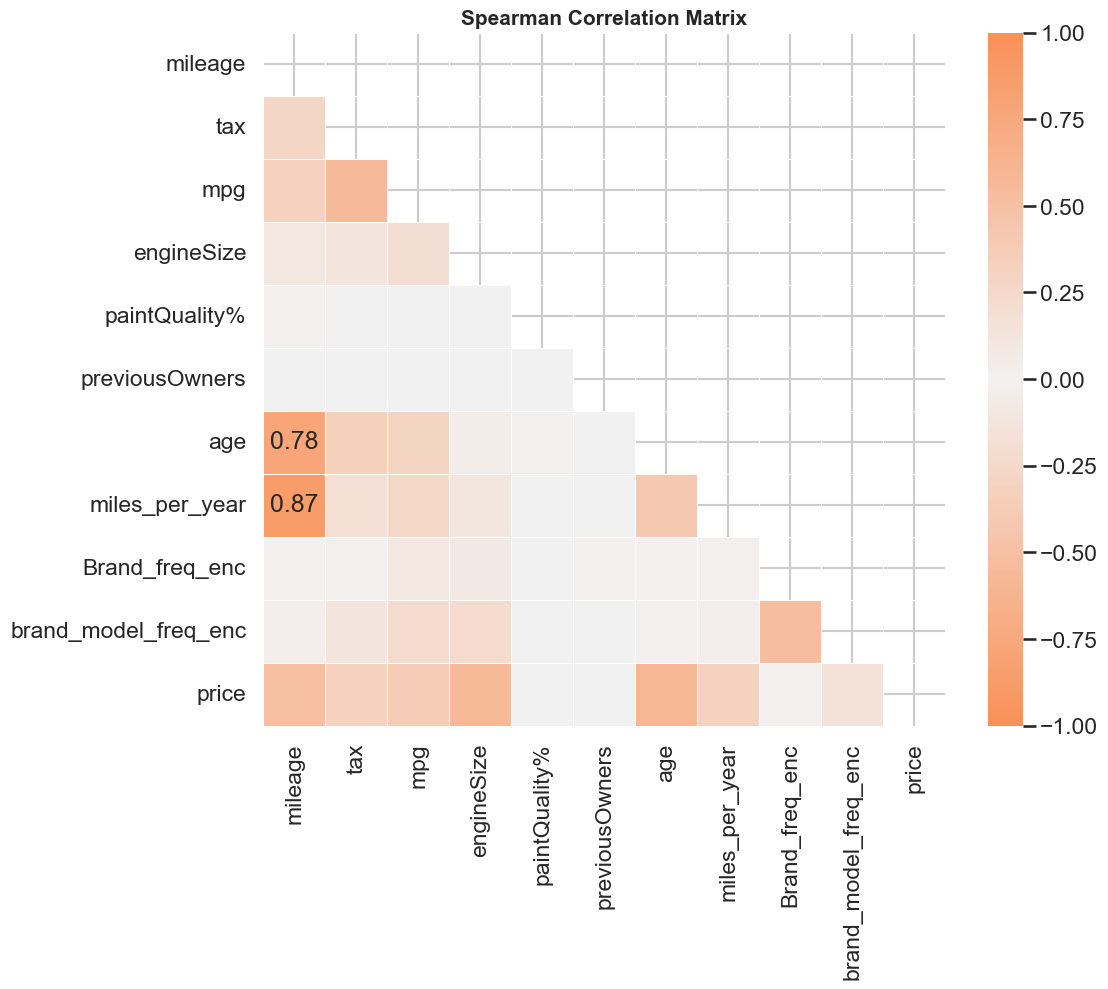

In [69]:
##### Spearman Correlation ####
cor = pd.concat([X_train_filtered, y_train], axis=1).corr(method='spearman').round(2)

# Create a custom diverging colormap based on orange tones
cmap = sns.diverging_palette(h_neg=30, h_pos=30, s=90, l=70, n=256, center="light", as_cmap=True) 

# Create a Mask to hide the upper triangle (to avoid redundancy)
mask = np.zeros_like(cor, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# Only show values where absolute correlation is >= 0.6
mask_annot = np.absolute(cor.values) >= 0.6
annot = np.where(mask_annot, cor.values, np.full(cor.shape, ""))


# Plotting
plt.figure(figsize=(11, 9))
sns.heatmap(
    data=cor,
    mask=mask,              # Hide the upper triangle
    cmap=cmap,              # Custom divergent color map
    annot=annot,            # Show annotations only if |value| >= 0.6
    fmt='s',                # Format annotations as strings
    vmin=-1, vmax=1, center=0, # Ensure the scale is from -1 to 1, centered at 0
    linewidths=0.5, 
)

plt.title('Spearman Correlation Matrix', fontsize=15, fontweight='bold')
plt.show()

In [ ]:
#NUMÉRCIAS (FREQ.) USASTE VIF PARA MULTICOLINERIDADE, SPEARMAN PARA MULTIC. E RELEVÂNCIA
# OR 

By the rule of thumb, two variables are considered **redundant** when their absolute correlation is **greater than or equal to 0.8**. This is the case for **`mileage`** and **`miles_per_year`**, which is expected since `miles_per_year` was derived from `mileage`. We decided to **drop `mileage`**, as `miles_per_year` captures more information and `mileage` is also **highly correlated with `age`**, which could lead to **multicollinearity issues** if kept in the model.

In [70]:
# look for irrelevant features with |correlation| < 0.1
cor_with_target = cor[y_train.name]
low_corr_features = cor_with_target[abs(cor_with_target) < 0.1].drop(y_train.name, errors='ignore') # Correlation with itself is 1, so we drop it

if not low_corr_features.empty:
    print(f"Found {len(low_corr_features)} variables with absolute correlation < 0.1:")
    # Sort by absolute value to see the least correlated ones first
    print(low_corr_features.abs().sort_values())
else:
    print(f"No variables found with absolute correlation < 0.1 with the target")

Found 3 variables with absolute correlation < 0.1:
paintQuality%     0.00
previousOwners    0.00
Brand_freq_enc    0.01
Name: price, dtype: float64


By the rule of thumb, features with an absolute correlation below **0.1** with the target variable are considered **irrelevant**, as they provide little to no predictive information. In our case, **`paintQuality%`**, **`previousOwners`**, and **`Brand_freq_enc`** show correlations below this threshold, indicating that they are unlikely to contribute meaningfully to the model’s performance and can therefore be **discarded**.

In [71]:
# Drop columns with high correlation with other variables (|correlation| >= 0.8) or low correlation with target (|correlation| < 0.1) 
corr_drop = ['paintQuality%','previousOwners', 'Brand_freq_enc','mileage'] 
for d in [X_train, X_val , X_test]:
    d.drop(columns=corr_drop, errors='ignore', inplace=True)

##### **Statistical Hypothesis Testing** 

In [72]:
# def TestIndependence(X_1, X_2):
#     # Build contingency table
#     dfObserved = pd.crosstab(X_1, X_2)
    
#     # Chi-square test
#     _, p, _, _ = stats.chi2_contingency(dfObserved.values)
    
#     # Interpret result: if p < 0.05, reject H0 (variables are not independent)
#     if p < 0.05:
#         result = f"The variables '{X_1.name}' and '{X_2.name}' are NOT independent (they are REDUNDANT)" # Reject H0 (H0: independent)
#     else:
#         result = f"The variables '{X_1.name}' and '{X_2.name}' are INDEPENDENT (they are NOT redundant)" # Fail to reject H0

#     print(result)

In [73]:
# # apply the Chi-Square test to all pairs of binary variables
# binary_cols = X_train.columns[X_train.nunique() == 2].tolist()
# for var1, var2 in combinations(binary_cols, 2):
#     TestIndependence(X_train[var1], X_train[var2])

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.2 |  Wrapper Methods</b></span>
    </h1>
</div>

<div style="background-color:#f9f9f9; border:1.5px solid #ccc; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
ESTE CÓDIGO É COPIADO DAS AULAS E É OK PODEMOS USAR MAS MUDAR UMA COISA OU OUTRA FICAVA BEM

In [74]:
#### RFE ####

#no of features
nof_list=np.arange(1,len(X_train.columns)+1)            
high_score=0
#Variable to store the optimum features
nof=0           
train_score_list =[]
val_score_list = []

for n in range(len(nof_list)):
    model = LinearRegression()
    
    rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_val_rfe = rfe.transform(X_val)
    model.fit(X_train_rfe,y_train)
    
    #storing results on training data
    train_score = model.score(X_train_rfe,y_train)
    train_score_list.append(train_score)
    
    #storing results on validation data
    val_score = model.score(X_val_rfe,y_val)
    val_score_list.append(val_score)
    
    #check best score
    if(val_score >= high_score):
        high_score = val_score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))


Optimum number of features: 10
Score with 10 features: 0.702321


In [75]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE


def find_optimal_features_rfe(model, X_train, y_train, X_val, y_val):
    nof_list = np.arange(1, len(X_train.columns) + 1)
    high_score = 0
    nof = 0
    train_score_list = []
    val_score_list = []

    print(f"Running RFE with model: {model.__class__.__name__}")

    for n in nof_list:
        # Use clone to ensure the model is "clean" in each iteration
        estimator = clone(model)
        
        rfe = RFE(estimator=estimator, n_features_to_select=n)
        X_train_rfe = rfe.fit_transform(X_train, y_train)
        X_val_rfe = rfe.transform(X_val)

        # Train the final model with the selected features
        estimator.fit(X_train_rfe, y_train)
        
        # Store the score results
        train_score = estimator.score(X_train_rfe, y_train)
        train_score_list.append(train_score)
        
        val_score = estimator.score(X_val_rfe, y_val)
        val_score_list.append(val_score)

        # Check best score
        if val_score >= high_score:
            high_score = val_score
            nof = n
            
    print(f"Completed. Optimal number of features: {nof} with a validation score of {high_score:.4f}")

    # Train one last time with the optimal number to get the final feature list
    final_rfe = RFE(estimator=clone(model), n_features_to_select=nof)
    final_rfe.fit(X_train, y_train)
    selected_features_names = X_train.columns[final_rfe.support_].tolist()

    # Return all useful results
    return {
        'optimal_n': nof,
        'best_score': high_score,
        'selected_features': selected_features_names,
        'train_scores': train_score_list,
        'val_scores': val_score_list
    }

In [76]:
# RFE with Linear Regression
lr_model = LinearRegression()
rfe_results_lr = find_optimal_features_rfe(lr_model, X_train, y_train, X_val, y_val)

# Results
print(f"Best Score: {rfe_results_lr['best_score']:.4f}")
print(f"Selected Features ({rfe_results_lr['optimal_n']}): {rfe_results_lr['selected_features']}")


# RFE with RandomForest Regressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1) # n_jobs=-1 use all processors
rfe_results_rf = find_optimal_features_rfe(rf_model, X_train, y_train, X_val, y_val)

# Results
print(f"Best Score: {rfe_results_rf['best_score']:.4f}")
print(f"Selected Features ({rfe_results_rf['optimal_n']}): {rfe_results_rf['selected_features']}")

Running RFE with model: LinearRegression
Completed. Optimal number of features: 10 with a validation score of 0.7023
Best Score: 0.7023
Selected Features (10): ['tax', 'mpg', 'engineSize', 'age', 'miles_per_year', 'brand_model_freq_enc', 'transmission_manual', 'transmission_semi auto', 'fuelType_hybrid', 'fuelType_petrol']
Running RFE with model: RandomForestRegressor
Completed. Optimal number of features: 8 with a validation score of 0.9275
Best Score: 0.9275
Selected Features (8): ['tax', 'mpg', 'engineSize', 'age', 'miles_per_year', 'brand_model_freq_enc', 'transmission_manual', 'fuelType_petrol']


In [77]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import KFold
est = LinearRegression()

sfs = SequentialFeatureSelector(
    est, n_features_to_select="auto", direction="forward", scoring="neg_mean_absolute_error",
    cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1
)
sfs.fit(X_train, y_train)
selected = X_train.columns[sfs.get_support()].tolist()


In [78]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

rfecv = RFECV(
    estimator=LinearRegression(), step=1,
    scoring="neg_mean_absolute_error",
    cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1
)
rfecv.fit(X_train, y_train)
selected = X_train.columns[rfecv.support_].tolist()


In [79]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.linear_model import LinearRegression

efs = ExhaustiveFeatureSelector(
    LinearRegression(), min_features=1, max_features=X_train.shape[1],
    scoring="neg_mean_absolute_error", cv=5, n_jobs=-1
)
efs = efs.fit(X_train.values, y_train.values)
selected_idx = list(efs.best_idx_)
selected = X_train.columns[selected_idx].tolist()


Features: 1023/1023

<div style="background-color: #e5c120ff; padding:15px; border-radius:10px;">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: rgba(255, 255, 255, 1);"><b>2.11.3 |  Embedded Methods</b></span>
    </h1>
</div>


- **Regularization methods**: These methods add a penalty term to the model's loss function that discourages the model from using too many features. Examples include Lasso (L1 regularization - which mmakes the weights of unimportant variables actually reach 0) and Ridge (L2 regularization - whose weights assymptotically tend to 0 - but do not reach it).

- **Tree-based methods**: These methods use decision trees to calculate feature importance based on how much each feature contributes to reducing the impurity of the tree. Examples include Random Forest and Gradient Boosting.

In [25]:
# Create Lasso Regression model
# alpha controls regularization strength
model = Lasso(alpha=0.1, random_state=42)

# Fit Lasso model
model.fit(X_train, y_train.ravel()) 

# Get selected features (those with non-zero coefficients)
selected_features_lasso = [col for col, coef in zip(X_train.columns, model.coef_) if abs(coef) > 0]

# Print the number and names of selected features
print(f"Number of Selected Features (Lasso): {len(selected_features_lasso)} / {len(X_train.columns)}")
print("Selected Features (Lasso):", selected_features_lasso)


C:\Users\filip\AppData\Local\Temp\ipykernel_16388\3270030933.py:6: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  model.fit(X_train, y_train.ravel())


Number of Selected Features (Lasso): 12 / 12
Selected Features (Lasso): ['mileage', 'tax', 'mpg', 'engineSize', 'age', 'miles_per_year', 'Brand_freq_enc', 'brand_model_freq_enc', 'transmission_manual', 'transmission_semi auto', 'fuelType_hybrid', 'fuelType_petrol']


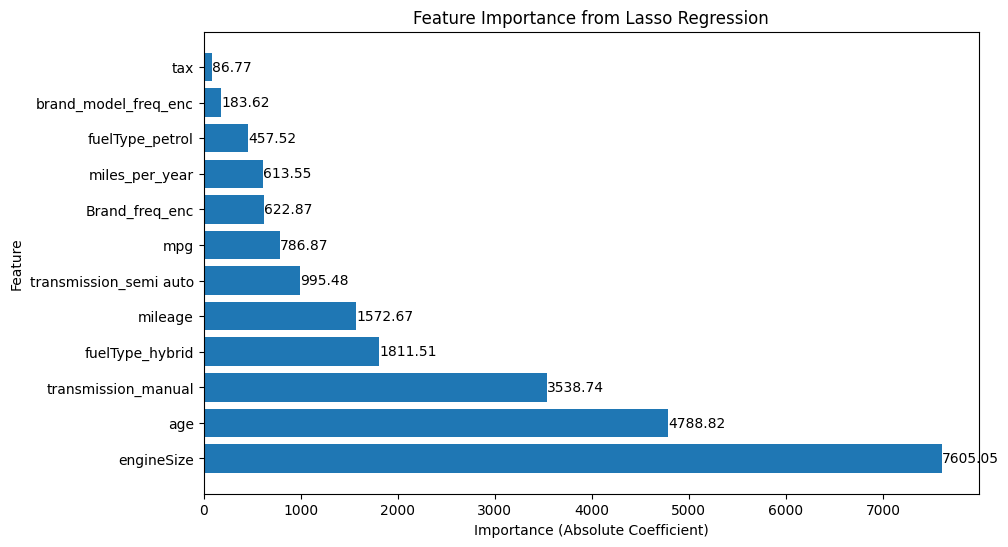

In [26]:
# Get absolute coefficients as feature importance for selected features
# Only include features with non-zero coefficients
feature_importance = np.abs(model.coef_)[model.coef_ != 0]

# Create a DataFrame to pair selected features with their importance values
importance_df = pd.DataFrame({
    'Feature': selected_features_lasso,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Create a horizontal bar plot for feature importances
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'])

# Add importance values as labels on the bars
for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
             f'{bar.get_width():.2f}', va='center', ha='left', fontsize=10)

# Label the axes and set the title
plt.xlabel('Importance (Absolute Coefficient)')
plt.ylabel('Feature')
plt.title('Feature Importance from Lasso Regression')

# Show the plot
plt.show()

Nós decidimos ficar com as variáveis que fossem recomendadas por pelo menos 3 dos 4 métodos usados (Spearman, RFE com Regressão Logística, RFE com SVM e Lasso). A tabela seguinte resume as decisões tomadas para cada variável:


| Predictor | Spearman | RFE LR| RFE SVM | Lasso | What to do?  | 
| --- | --- | --- | --- |--- |---|
| VAR1 | Keep | Keep | Keep |Keep | Keep |
| VAR2 | Keep | Keep | Keep |Keep| Discard |
| VAR3 | Keep?| Discard | Discard |Keep ?| Discard |
| VAR4 | Keep | Keep | Keep | Keep | Keep |
| VAR5 | Keep? | Discard | Keep | Keep | Keep |
# <span style="color: #ffffff;">3 | Regression Benchmarking</span>

<div style="background-color:#e5c120ff; padding:15px; border-radius:10px; 
            box-shadow: 0px 4px 12px rgba(227, 167, 108, 1);">
    <h1 style="margin:0; color:white; font-family:sans-serif; font-size:24px;">
         <span style="color: #644712ff;"><b>3 | Regression Benchmarking</b></span>
    </h1>
</div>

<br>
<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">
PASSOS A SEGUIR: <BR>
- Explanation of model assessment strategy and metrics used
- Feature Selection Strategy and results
- Comparison of performance between candidate models
<br><br>
 - Identify the type of problem and select the relevant algorithms.
 - Select one model assessment strategy to use throughout your work. Which metrics are you using to evaluate your model and why?
 - Train at least 1 model using the train dataset and obtain predictions for the test dataset.(Extra 1 point) Be on the Top-5 Best Groups in the Kaggle Competition
</div>


We are dealing with a **supervised regression problem**, as the target variable `price` is **numerical and continuous**. The goal is to train a model that learns the relationship between car characteristics (`Brand`, `model`, `mileage`, `year`, ...) and `price`, allowing it to predict the value of unseen cars.

Both **linear models** (e.g., *Linear Regression*, *Ridge*, *ElasticNet*) and **non-linear models** (e.g., *KNN*, *Decision Tree*, *SVR*) can be applied. In this problem, we focus on predicting the **median price** because car prices often include **outliers or extreme values** that could skew mean-based predictions. The **median is robust** to such extremes, providing more reliable predictions for typical cars.

For this reason, **median-based loss functions** such as *MAE* (Mean Absolute Error) or *Pinball Loss* with α = 0.5 are most appropriate, as they are **strictly consistent for the median functional**. We will use *MAE* as the primary metric, in line with the Kaggle competition, while monitoring other metrics to track overall model performance.




<div style="background-color:#e4b3c2ff; border:1.5px solid #e4b3c2ff; border-radius:8px; padding: 10px; width:1130px; text-align: justify;">

O STOR DISSE QUE UM DOS PASSOS MAIS ESSENCIAIS É ESCOLHER BEM A **FITNESS F.**:    
O AI DEU-ME ISTO:

**Huber Loss** (A escolha padrão e mais recomendada):<BR>
Como funciona: É um híbrido. Para erros pequenos, comporta-se como o Erro Quadrático Médio (MSE), sendo eficiente. Para erros grandes (causados por outliers), comporta-se como o Erro Absoluto Médio (MAE), sendo robusto.
Como usar: Use modelos que a implementam diretamente, como HuberRegressor em scikit-learn.

**Erro Absoluto Médio** (MAE ou L1 Loss):<BR>
Como funciona: Penaliza o erro linearmente, não quadraticamente. Um outlier tem uma influência proporcional, não desproporcional.
Como usar: Use modelos como Lasso ou SGDRegressor(loss='epsilon_insensitive').

- TEMOS QUE USAR A MEDIDA QUE O PROF DIZ LÁ NO KAAGLE QUE NOS VAI AVALIAR MAS AS OUTRAS TEMOS DE TER UMA BOA JUSTIFICAÇÃO E NÃO USAR R^2 PORQUE É TIPO A PIOR MEDIDA!!!

DIZER PORQUÊ QUE UM MODELO É MELHOR COM OUTRO EM TERMOS DE PERFORMANCE

In [27]:
# Model definitions
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "RandomForest": RandomForestRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "DecisionTree": DecisionTreeRegressor(),
    "KNeighbors": KNeighborsRegressor()
}

# Dictionary to store results
results = {}

# Iterate over each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_val_pred   = model.predict(X_val)

    # Calculate metrics
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_val   = mean_absolute_error(y_val, y_val_pred)
    rmse_val  = np.sqrt(mean_squared_error(y_val, y_val_pred))
    r2_val    = r2_score(y_val, y_val_pred)

    # Store results
    results[model_name] = {
        "MAE_train": mae_train,
        "MAE_val": mae_val
    }

    # Print results
    print(f"{model_name} — MAE (train): {mae_train:.4f}, MAE (val): {mae_val:.4f}")
    print("-" * 60)

# Summary table
results_df = pd.DataFrame(results).T
display(results_df)


Training LinearRegression...


ValueError: Found input variables with inconsistent numbers of samples: [15191, 15193]